### IMPORT LIBRARIES AND DATASETS

In [52]:
#!pip install jupyterthemes
#!pip install wordcloud
#!pip install --upgrade scikit-learn

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string
import re
import nltk # Natural Language tool kit 
from nltk.corpus import stopwords
from jupyterthemes import jtplot
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 


import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.model_selection import GridSearchCV, cross_validate, RandomizedSearchCV, validation_curve
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, f1_score, roc_auc_score, precision_score, recall_score

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
# setting the style of the notebook to be monokai theme  
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them. 


In [2]:
# Load the data

tweets_df = pd.read_csv("twitter.csv")
tweets_df

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [3]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [4]:
## Statistical summary of the dataset.

tweets_df.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


In [5]:
## Only access the tweet column

tweets_df['tweet']

0         @user when a father is dysfunctional and is s...
1        @user @user thanks for #lyft credit i can't us...
2                                      bihday your majesty
3        #model   i love u take with u all the time in ...
4                   factsguide: society now    #motivation
                               ...                        
31957    ate @user isz that youuu?ðððððð...
31958      to see nina turner on the airwaves trying to...
31959    listening to sad songs on a monday morning otw...
31960    @user #sikh #temple vandalised in in #calgary,...
31961                     thank you @user for you follow  
Name: tweet, Length: 31962, dtype: object

In [6]:
# Drop the 'id' column

tweets_df = tweets_df.drop(['id'], axis=1)
tweets_df

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
...,...,...
31957,0,ate @user isz that youuu?ðððððð...
31958,0,to see nina turner on the airwaves trying to...
31959,0,listening to sad songs on a monday morning otw...
31960,1,"@user #sikh #temple vandalised in in #calgary,..."


#### DATA EXPLORATION

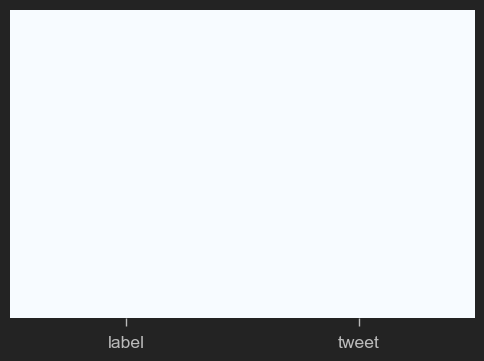

In [7]:
## Check missing value in the dataset by creating heatmap

plt.figure(figsize=(6, 4))
sns.heatmap(tweets_df.isnull(), yticklabels=False, cbar=False, cmap="Blues")
plt.show()

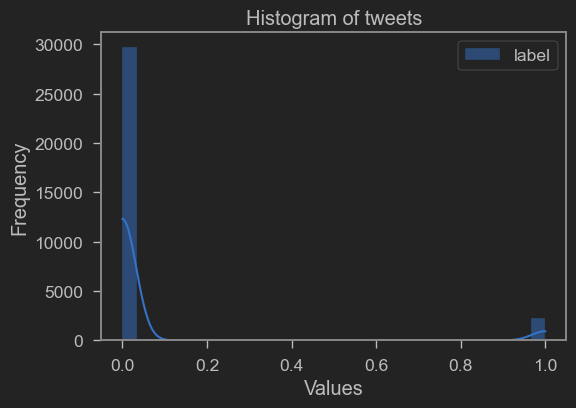

In [8]:
# Plot the histogram

plt.figure(figsize=(6, 4))  # Grafik boyutunu belirle
sns.histplot(tweets_df, bins=30, kde=True, color="blue")
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Histogram of tweets")
plt.show()


In [9]:
## Countplot

# sns.countplot(tweets_df["label"], label="Count")

In [10]:
# Let's get the length of the messages

tweets_df["length"] = tweets_df["tweet"].apply(len)

In [11]:
tweets_df

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39
...,...,...,...
31957,0,ate @user isz that youuu?ðððððð...,68
31958,0,to see nina turner on the airwaves trying to...,131
31959,0,listening to sad songs on a monday morning otw...,63
31960,1,"@user #sikh #temple vandalised in in #calgary,...",67


In [12]:
tweets_df.describe()

,label,length
count,31962.000000,31962.000000
mean,0.070146,84.739628
std,0.255397,29.455749
min,0.000000,11.000000
25%,0.000000,63.000000
50%,0.000000,88.000000
75%,0.000000,108.000000
max,1.000000,274.000000


In [13]:
# Let's view the shortest message 

tweets_df[tweets_df["length"]==11]["tweet"]

25195    i love you 
Name: tweet, dtype: object

In [14]:
# Let's view the tweet that has the average number of the characters

tweets_df[tweets_df["length"]== 84]["tweet"]

43       my mom shares the same bihday as @user   bihda...
220      g o a l s ð repost from @user #propey #ocea...
640      oscar tabarez talks luis suarezâs angry reac...
723       @user another hands &amp; feet complete!! ber...
742      because great things never came from comfo zon...
                               ...                        
31445    .@user on making choices to keep herself   as ...
31448    i'm a gordo. #passpo #florence #firenze #italy...
31509    just 3 keys that are found on your computer to...
31857    traveling happy #family   holidays #car #sunny...
31883    we spent #familytime by doing simple wefie, we...
Name: tweet, Length: 333, dtype: object

In [15]:
## OnLY reach first element for mean

tweets_df[tweets_df["length"]== 84]["tweet"].iloc[0]

'my mom shares the same bihday as @user   bihday snake! see you this weekend ð\x9f\x99\x8cð\x9f\x8f¼'

<Axes: ylabel='Frequency'>

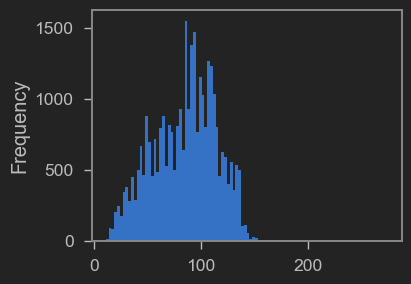

In [16]:
# Plot the histogram of the length column

tweets_df["length"].plot(bins=100, figsize=(4,3), kind="hist")

####  PLOT THE WORDCLOUD

In [17]:
positive = tweets_df[tweets_df['label']==0]
positive

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39
...,...,...,...
31956,0,off fishing tomorrow @user carnt wait first ti...,61
31957,0,ate @user isz that youuu?ðððððð...,68
31958,0,to see nina turner on the airwaves trying to...,131
31959,0,listening to sad songs on a monday morning otw...,63


In [18]:
negative = tweets_df[tweets_df['label']==1]
negative

,label,tweet,length
13,1,@user #cnn calls #michigan middle school 'buil...,74
14,1,no comment! in #australia #opkillingbay #se...,101
17,1,retweet if you agree!,22
23,1,@user @user lumpy says i am a . prove it lumpy.,47
34,1,it's unbelievable that in the 21st century we'...,104
...,...,...,...
31934,1,lady banned from kentucky mall. @user #jcpenn...,59
31946,1,@user omfg i'm offended! i'm a mailbox and i'...,82
31947,1,@user @user you don't have the balls to hashta...,112
31948,1,"makes you ask yourself, who am i? then am i a...",87


In [19]:
## Purpose : Combine all positive tweets and create one string

sentences = tweets_df['tweet'].tolist()
len(sentences)

31962

In [20]:
sentences_as_one_string =" ".join(sentences)
# sentences_as_one_string

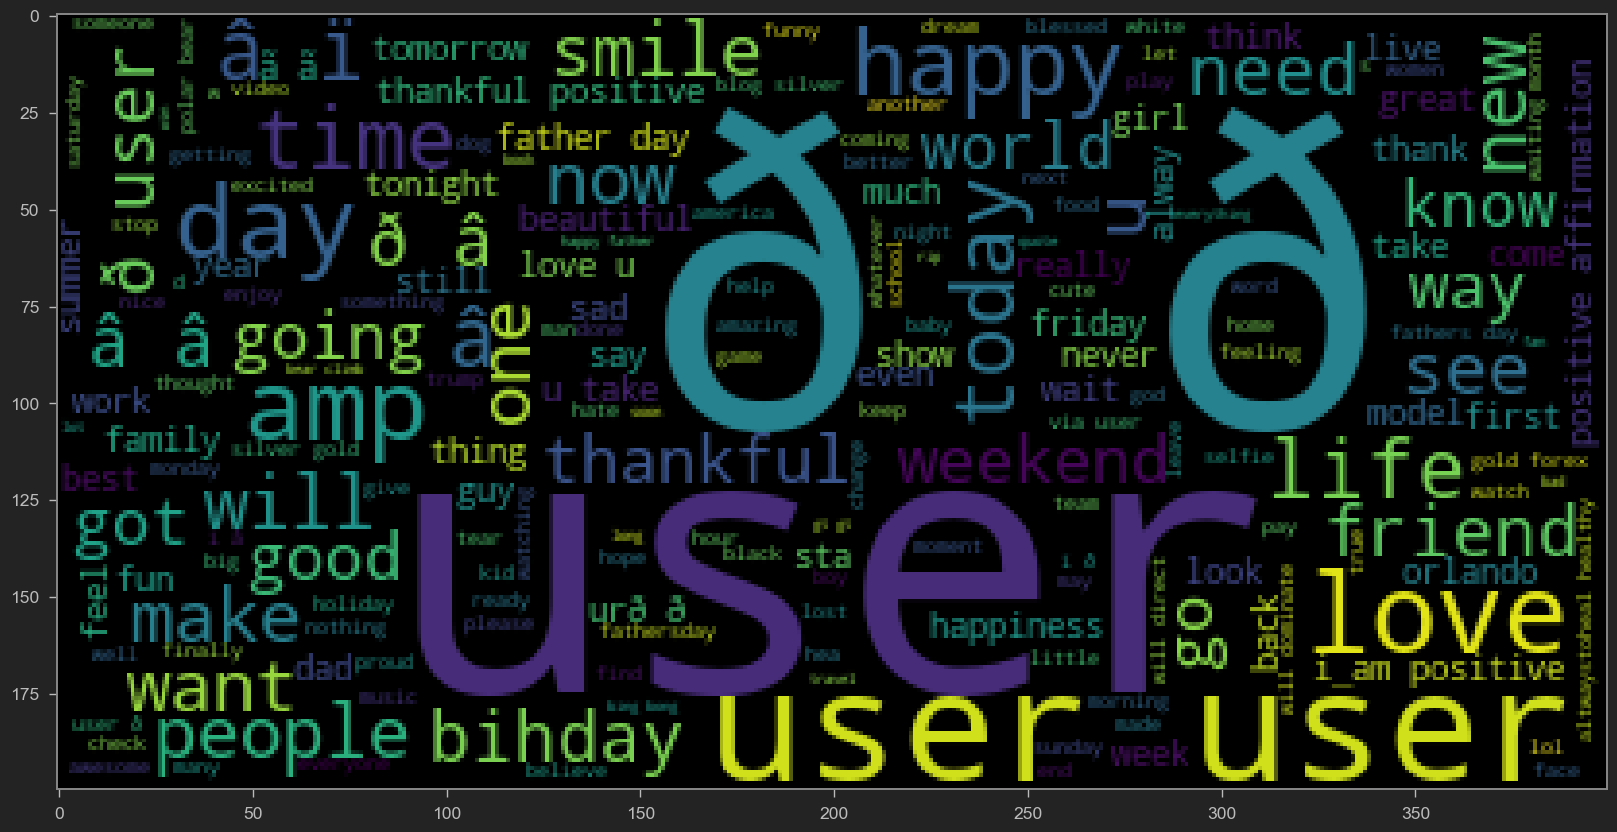

In [21]:
## Create a wordCloud 

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

In [22]:
### Plot the wordcloud of the negative

negative_list= negative["tweet"].tolist()

negative_sentences_as_one_string =" ".join(negative_list)
#negative_sentences_as_one_string

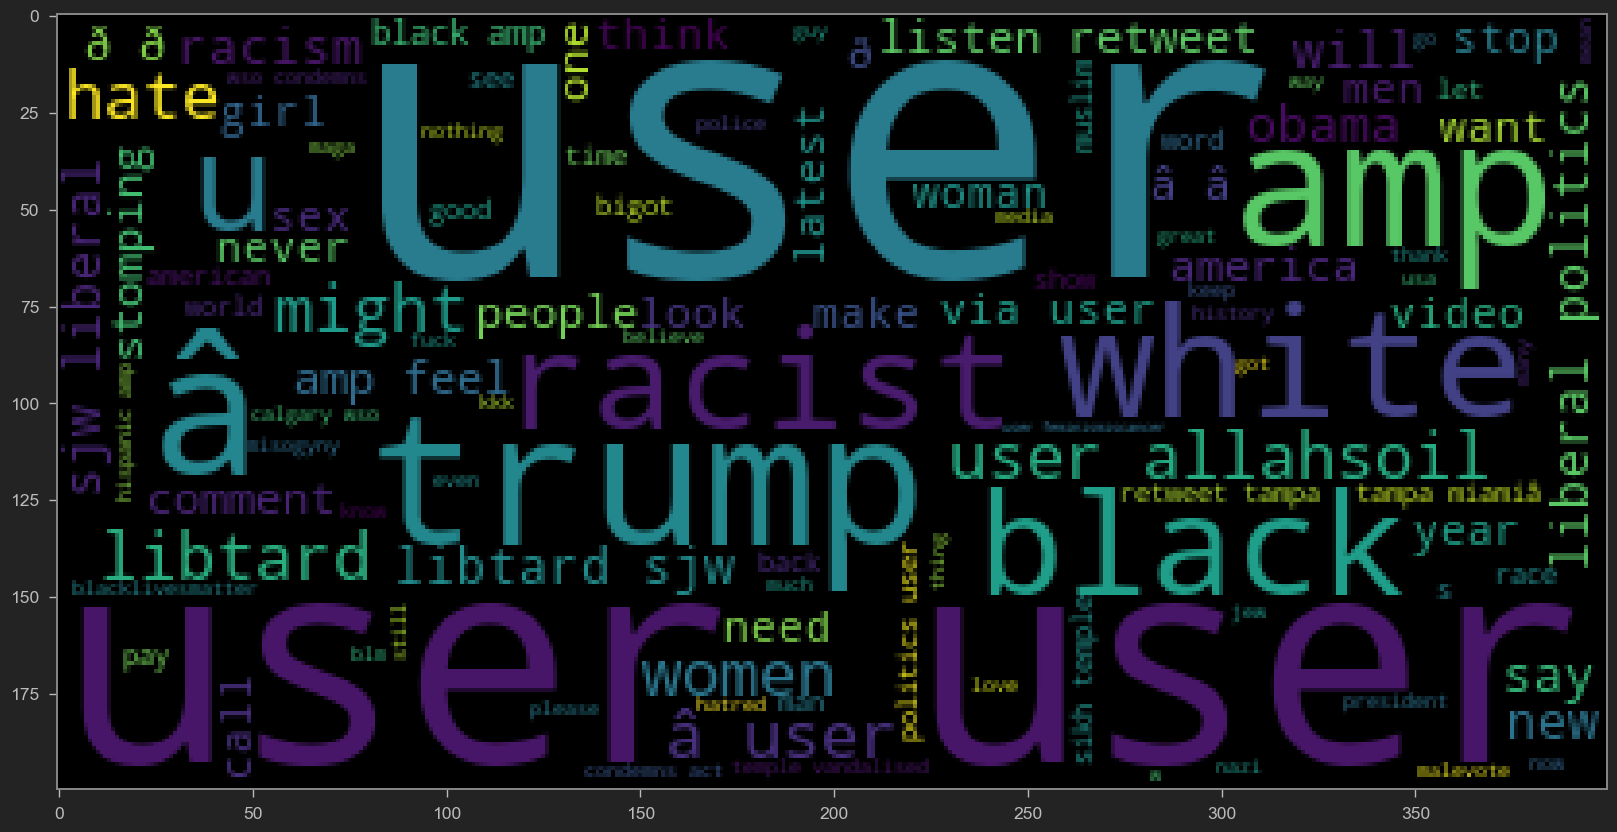

In [23]:
## Create a wordCloud 

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(negative_sentences_as_one_string))

### DATA CLEANING

##### REMOVE PUNCTUATION FROM TEXT

In [24]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [25]:
## Simple cleaning

Test = '$I love AI & Machine learning!!'

Test_punc_removed = [char for char in Test if char not in string.punctuation]
Test_punc_removed

['I',
 ' ',
 'l',
 'o',
 'v',
 'e',
 ' ',
 'A',
 'I',
 ' ',
 ' ',
 'M',
 'a',
 'c',
 'h',
 'i',
 'n',
 'e',
 ' ',
 'l',
 'e',
 'a',
 'r',
 'n',
 'i',
 'n',
 'g']

In [26]:
# Join the characters again to form the string.
Test_punc_removed_join = ''.join(Test_punc_removed)
Test_punc_removed_join

'I love AI  Machine learning'

##### REMOVE STOPWORDS

In [27]:
nltk.download('stopwords')

stopwords.words('english')

[nltk_data] Downloading package stopwords to C:\Users\KAZIM
[nltk_data]     BEKTAS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [28]:
## Lets Practice

Test_punc_removed_join = 'I enjoy coding, programming and Artificial intelligence'
Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]

In [29]:
# Only important (no so common) words are left

Test_punc_removed_join_clean

['enjoy', 'coding,', 'programming', 'Artificial', 'intelligence']

##### COUNT VECTORIZATION (TOKENIZATION)

In [30]:
sample_data = ['This is the first paper.','This document is the second paper.','And this is the third one.','Is this the first paper?']


vectorizer= CountVectorizer()

X= vectorizer.fit_transform(sample_data)

print(vectorizer.get_feature_names_out())

['and' 'document' 'first' 'is' 'one' 'paper' 'second' 'the' 'third' 'this']


In [31]:
print(X.toarray())

[[0 0 1 1 0 1 0 1 0 1]
 [0 1 0 1 0 1 1 1 0 1]
 [1 0 0 1 1 0 0 1 1 1]
 [0 0 1 1 0 1 0 1 0 1]]


##### CREATE A PIPELINE

In [32]:
# Let's define a pipeline to clean up all the messages 
# The pipeline performs the following: (1) remove punctuation, (2) remove stopwords

# def message_cleaning(message):
#    Test_punc_removed = [char for char in message if char not in string.punctuation]
#    Test_punc_removed_join = ''.join(Test_punc_removed)
#    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
#    return Test_punc_removed_join_clean


def message_cleaning(message):
    # Store stopwords once to avoid multiple calls
    stop_words = set(stopwords.words('english'))
    
    # Remove non-ASCII characters (including emojis)
    message = re.sub(r'[^\x00-\x7F]+', '', message)
    message = re.sub(r'\d+', '', message)  # Remove digits
    
    # Remove punctuation
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)

    # Remove stopwords and words that are too repetitive
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() 
                                    if word.lower() not in stop_words 
                                    and len(word) > 2 
                                    and not re.match(r"^(.)\1{2,}$", word)]

    return Test_punc_removed_join_clean


In [33]:
# Let's test the newly added function

tweets_df_clean = tweets_df['tweet'].apply(message_cleaning)

In [34]:
print(tweets_df_clean[5]) # show the cleaned up version

['huge', 'fan', 'fare', 'big', 'talking', 'leave', 'chaos', 'pay', 'disputes', 'get', 'allshowandnogo']


In [35]:
print(tweets_df['tweet'][5]) # show the original version

[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo  


In [36]:
tweets_df_clean

0        [user, father, dysfunctional, selfish, drags, ...
1        [user, user, thanks, lyft, credit, cant, use, ...
2                                        [bihday, majesty]
3                                [model, love, take, time]
4                        [factsguide, society, motivation]
                               ...                        
31957                              [ate, user, isz, youuu]
31958    [see, nina, turner, airwaves, trying, wrap, ma...
31959    [listening, sad, songs, monday, morning, otw, ...
31960    [user, sikh, temple, vandalised, calgary, wso,...
31961                                [thank, user, follow]
Name: tweet, Length: 31962, dtype: object

In [37]:
# Define the cleaning pipeline we defined earlier

vectorizer = CountVectorizer(analyzer = message_cleaning, dtype = np.uint8)

tweets_countvectorizer = vectorizer.fit_transform(tweets_df['tweet'])

In [38]:
print(vectorizer.get_feature_names_out())

['aaaaaand' 'aaaaah' 'aaaaand' ... 'zurich' 'zydeco' 'zzzzzzs']


In [39]:
print(tweets_countvectorizer.toarray())  

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [40]:
tweets_countvectorizer.shape

(31962, 39214)

##### PREPEARING MODEL

In [41]:
X = pd.DataFrame(tweets_countvectorizer.toarray())

In [42]:
X

,0,1,2,3,4,5,6,7,8,9,...,39204,39205,39206,39207,39208,39209,39210,39211,39212,39213
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31957,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31958,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31959,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31960,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
## TARGET

y = tweets_df['label']

### NAIVE BAYES MODEL

##### * NAIVE BAYES is a classification technique based on Bayes' Theorem.*

In [44]:
# TRAIN AND EVALUATE A NAIVE BAYES CLASSIFIER MODEL

In [45]:
X.shape

(31962, 39214)

In [46]:
y.shape

(31962,)

In [47]:
## Split datset train and test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [48]:
## Create NB object

NB_classifier= MultinomialNB()

NB_classifier.fit(X_train, y_train)

MultinomialNB()

<Axes: >

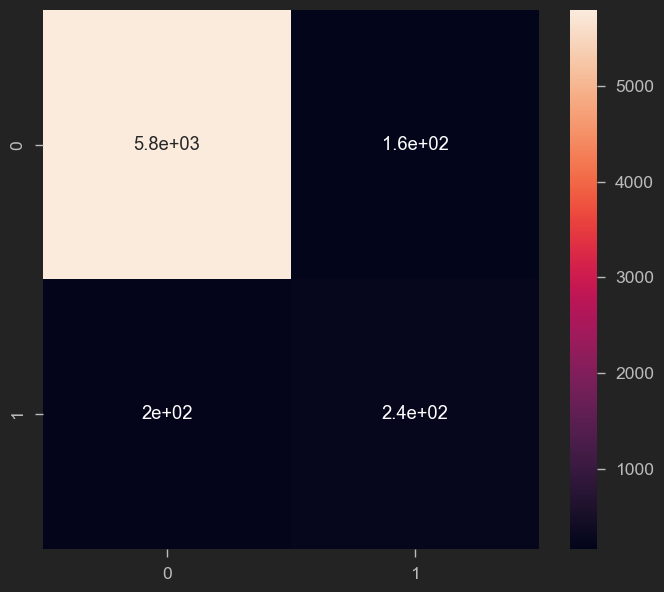

In [49]:
# Predicting the Test set results

y_predict_test = NB_classifier.predict(X_test)

cm = confusion_matrix(y_test, y_predict_test)

sns.heatmap(cm, annot=True)

In [50]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      5957
           1       0.59      0.54      0.56       436

    accuracy                           0.94      6393
   macro avg       0.78      0.76      0.77      6393
weighted avg       0.94      0.94      0.94      6393



### OTHER MODELS

In [53]:
def base_models(X, y, scoring=["accuracy", "f1", "roc_auc", "precision", "recall"]):
    print("Base Models....")
    classifiers = [
        ('LR', LogisticRegression()),
        ('KNN', KNeighborsClassifier()),
        ("SVC", SVC(probability=True)),
        ("CART", DecisionTreeClassifier()),
        ("RF", RandomForestClassifier()),
        ('Adaboost', AdaBoostClassifier(algorithm='SAMME')),
        ('GBM', GradientBoostingClassifier()),
        ('XGBoost', XGBClassifier(eval_metric='logloss')),
        ('LightGBM', LGBMClassifier(force_col_wise=True, verbose=-1)),
        # ('CatBoost', CatBoostClassifier(verbose=False))
    ]

    # Skorlayıcıları tanımlayın ve zero_division parametresini ayarlayın
    scoring = {
        'accuracy': make_scorer(accuracy_score),
        'f1': make_scorer(f1_score, zero_division=1),
        'roc_auc': make_scorer(roc_auc_score, needs_proba=True),
        'precision': make_scorer(precision_score, zero_division=1),
        'recall': make_scorer(recall_score, zero_division=1)
    }

    for name, classifier in classifiers:
        cv_results = cross_validate(classifier, X, y, cv=10, scoring=scoring)
        print(f"########## {name} ##########")
        print(f"Accuracy: {round(cv_results['test_accuracy'].mean(), 4)}")
        print(f"Auc: {round(cv_results['test_roc_auc'].mean(), 4)}")
        print(f"Recall: {round(cv_results['test_recall'].mean(), 4)}")
        print(f"Precision: {round(cv_results['test_precision'].mean(), 4)}")
        print(f"F1: {round(cv_results['test_f1'].mean(), 4)}")

# Örnek kullanım (X ve y verilerinizi tanımlayın)
# base_models(X, y)


In [ ]:
base_models(X, y)

Base Models....
